In [13]:
import numpy as np 
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(42)

size = 1000  # Total users
group = np.random.choice(['A', 'B'], size=size)

converted = [np.random.binomial(1, 0.12) if g == 'A' else np.random.binomial(1, 0.16) for g in group]

# Create DataFrame
df = pd.DataFrame({
    'user_id': range(1, size+1),
    'group': group,
    'converted': converted
})
df.head()

,user_id,group,converted
0,1,A,0
1,2,B,0
2,3,A,0
3,4,A,0
4,5,A,0


In [5]:
df.info 

<bound method DataFrame.info of      user_id group  converted
0          1     A          0
1          2     B          0
2          3     A          0
3          4     A          0
4          5     A          0
..       ...   ...        ...
995      996     A          0
996      997     A          0
997      998     B          0
998      999     B          0
999     1000     A          0

[1000 rows x 3 columns]>

In [7]:
# Group-wise summary
conversion_summary = df.groupby('group')['converted'].agg(['count', 'sum'])
conversion_summary.columns = ['Total Users', 'Total Conversions']
conversion_summary['Conversion Rate (%)'] = (conversion_summary['Total Conversions'] / conversion_summary['Total Users']) * 100


conversion_summary

,Total Users,Total Conversions,Conversion Rate (%)
group,,,
A,490,53,10.816327
B,510,86,16.862745


In [9]:
from statsmodels.stats.proportion import proportions_ztest

# Successes (conversions) in each group
successes = [53, 86]

# Number of observations (users) in each group
n_obs = [490, 510]

# two-proportion z-test
z_stat, p_val = proportions_ztest(count=successes, nobs=n_obs, alternative='two-sided')

print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

if p_val < 0.05:
    print(" Result: Statistically significant difference! Reject the null hypothesis.")
else:
    print("Result: Not significant. Can't reject the null hypothesis.")


Z-Statistic: -2.7629
P-Value: 0.0057
 Result: Statistically significant difference! Reject the null hypothesis.


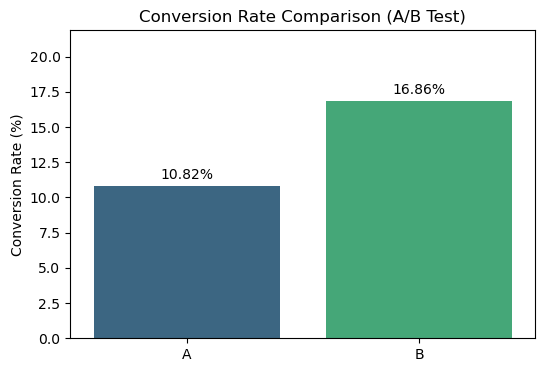

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

groups = ['A', 'B']
conversion_rates = [53/490 * 100, 86/510 * 100]

plt.figure(figsize=(6, 4))
sns.barplot(x=groups, y=conversion_rates, palette='viridis')
plt.title('Conversion Rate Comparison (A/B Test)')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, max(conversion_rates) + 5)

for i, rate in enumerate(conversion_rates):
    plt.text(i, rate + 0.5, f'{rate:.2f}%', ha='center')

plt.show()

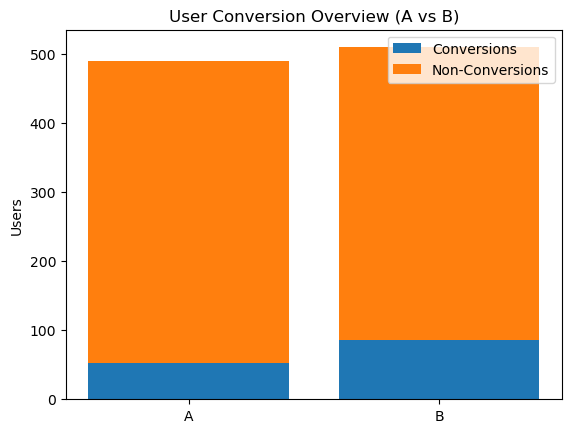

In [17]:
groups = ['A', 'B']
conversions = [53, 86]
non_conversions = [490-53, 510-86]

# Stacked bar chart
plt.bar(groups, conversions, label='Conversions')
plt.bar(groups, non_conversions, bottom=conversions, label='Non-Conversions')
plt.title('User Conversion Overview (A vs B)')
plt.ylabel('Users')
plt.legend()
plt.show()

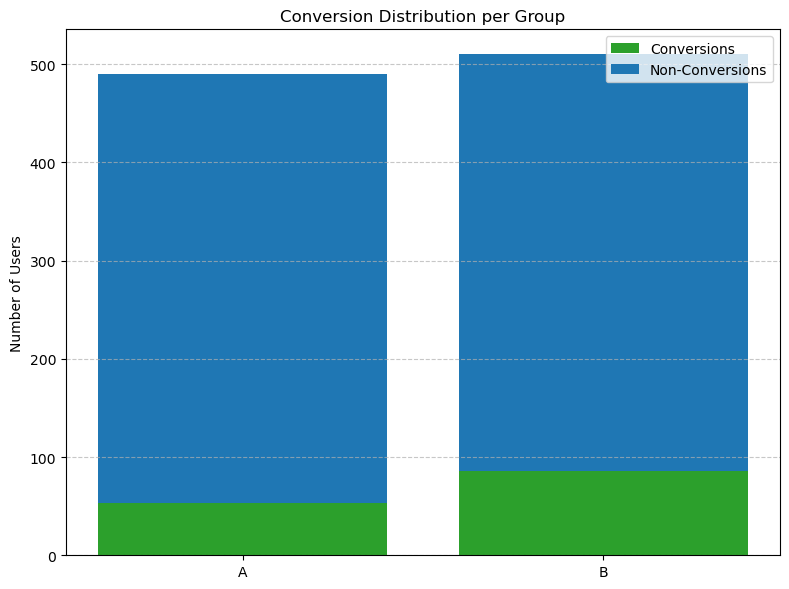

In [19]:
groups = ['A', 'B']
conversions = [53, 86]
non_conversions = [490 - 53, 510 - 86]

# Plot
plt.figure(figsize=(8,6))
plt.bar(groups, conversions, label='Conversions', color='#2ca02c')
plt.bar(groups, non_conversions, bottom=conversions, label='Non-Conversions', color='#1f77b4')
plt.title('Conversion Distribution per Group')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

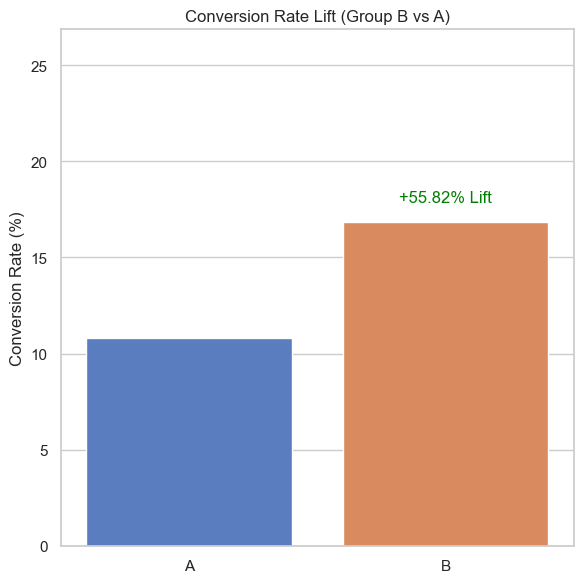

In [21]:
conversion_rates = [10.82, 16.86]
lift = ((conversion_rates[1] - conversion_rates[0]) / conversion_rates[0]) * 100

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
sns.barplot(x=['A', 'B'], y=conversion_rates, palette='muted')
plt.text(1, conversion_rates[1] + 1, f'+{lift:.2f}% Lift', ha='center', fontsize=12, color='green')
plt.title('Conversion Rate Lift (Group B vs A)')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, max(conversion_rates) + 10)
plt.tight_layout()
plt.show()

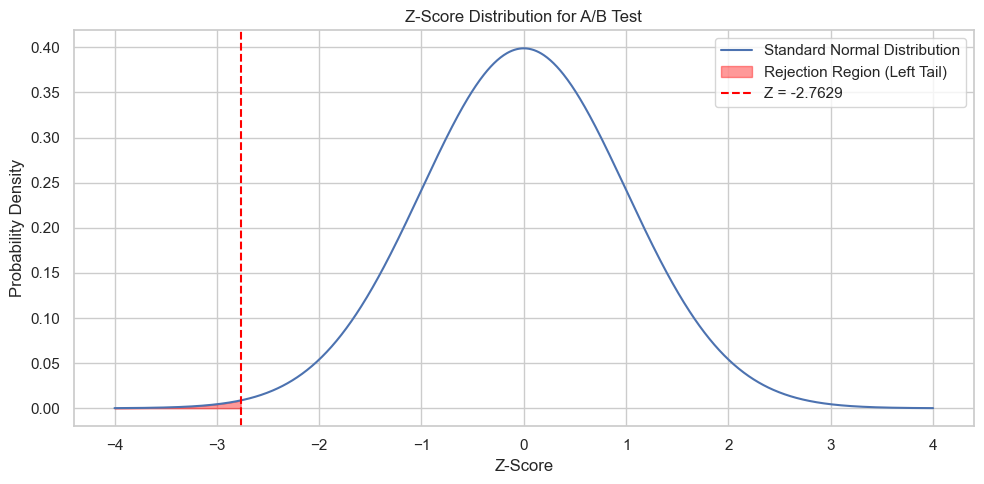

In [23]:
from scipy.stats import norm

# Z-stat and P-value
z_stat = -2.7629
p_val = 0.0057

# Normal curve
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Standard Normal Distribution')
plt.fill_between(x, y, where=(x < z_stat), color='red', alpha=0.4, label='Rejection Region (Left Tail)')
plt.axvline(z_stat, color='red', linestyle='--', label=f'Z = {z_stat}')
plt.title('Z-Score Distribution for A/B Test')
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()